# Spruce Budworm
We will now use the tools we have learned to perform a simple study of a certain first order ODE problem. The problem comes from Spruce Budworm that has a tendency to periodically eat up fir tree forests in eastern Canada. The original research comes from Ludwig 1976 available here: https://www.jstor.org/stable/3939?seq=1 but is also discussed in a very good book by Strogatz "Nonlinear Dynamics and Chaos".

0. Solve simple logistic problem with no predation
1. Examine the problem. Try to determine fixed points of the solution.
2. Solve the ODE for different initial conditions. Check what the solution approaches to.
3. Prepare the solution surface as a function of system parameters and determine "refuge", "bistable" and "outbreak" states. Try out different initial conditions.
4. Examine evolution of the system as parameters are slowly varied in time.
5. What should we do with the bugs?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Produces 3D axes setting
from scipy.integrate import odeint
from matplotlib import cm
from scipy.optimize import root_scalar

In [3]:
def simple_rhs(x0, t0=0):
    return [ r * x0[0] * (1 - x0[0] / k) ]

In [4]:
r = 0.8
k = 5
x0 = 0.3
t = np.linspace(0, 20, 100)
xt = odeint(simple_rhs, x0, t)

x0 = 15
xt2 = odeint(simple_rhs, x0, t)

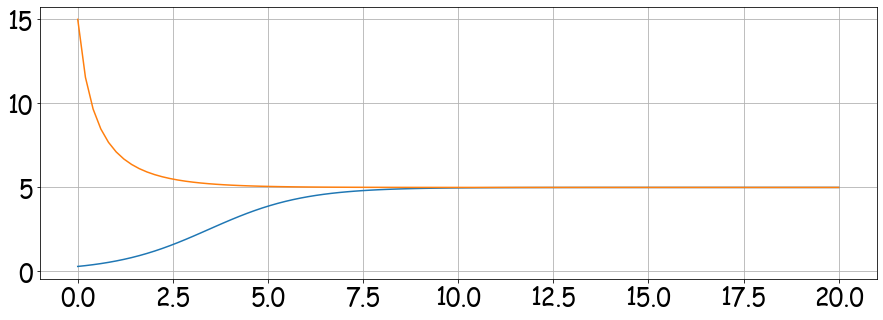

In [5]:
f = plt.figure(figsize=(15,5))
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(t, xt, t, xt2)

plt.grid()

(0.0, 1.0)

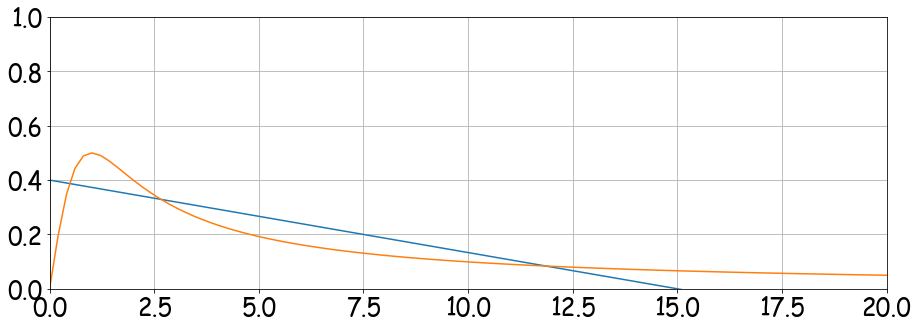

In [26]:
f = plt.figure(figsize=(15,5))

x = np.linspace(0, 20, 100)

r=0.4
k=15
plt.plot(x, r*(1-x/k))
plt.plot(x, x/(1+x**2))

plt.grid()
plt.xlim(0, 20)
plt.ylim(0, 1)

In [36]:
def rhs(x0, t0=0):
    return [ r * x0[0] * (1 - x0[0] / k) - x0[0]**2 / (1 + x0[0]**2) ]
def fun(xx):
    val = rhs([xx], 0)
    return val[0] # we note equation is not explicitly dependant on time

In [39]:
res = root_scalar(fun, x0=0.1, x1=2)
print(res)
res = root_scalar(fun, x0=0.5, x1=3)
print(res)
res = root_scalar(fun, x0=10, x1=15)
print(res)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.4745870096206228
      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 2.664828946811628
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 11.860584043567762


(0.0, 1.0)

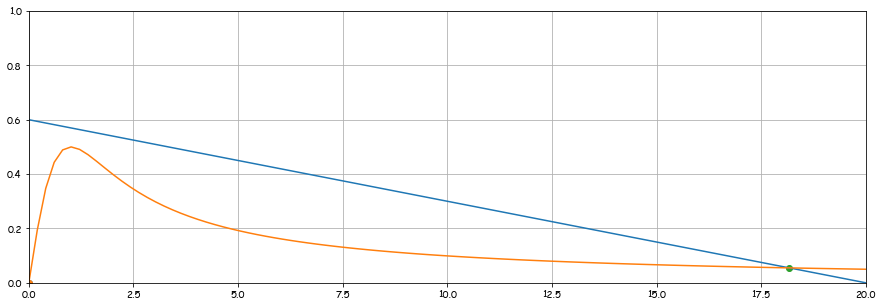

In [79]:
%matplotlib inline
f = plt.figure(figsize=(15,5))

x = np.linspace(0, 20, 100)

r=0.6
k=20
plt.plot(x, r*(1-x/k))
plt.plot(x, x/(1+x**2))

res = root_scalar(fun, x0=0.1, x1=2)
x = res.root
plt.scatter(x, x/(1+x**2) )

res = root_scalar(fun, x0=0.5, x1=3)
x = res.root
plt.scatter(x, x/(1+x**2) )

res = root_scalar(fun, x0=10, x1=15)
x = res.root
plt.scatter(x, x/(1+x**2) )

plt.grid()
plt.xlim(0, 20)
plt.ylim(0, 1)

In [46]:
x0 = 0.2
xt1 = odeint(rhs, x0, t)

x0 = 2
xt2 = odeint(rhs, x0, t)

x0 = 5
xt3 = odeint(rhs, x0, t)

x0 = 15
xt4 = odeint(rhs, x0, t)

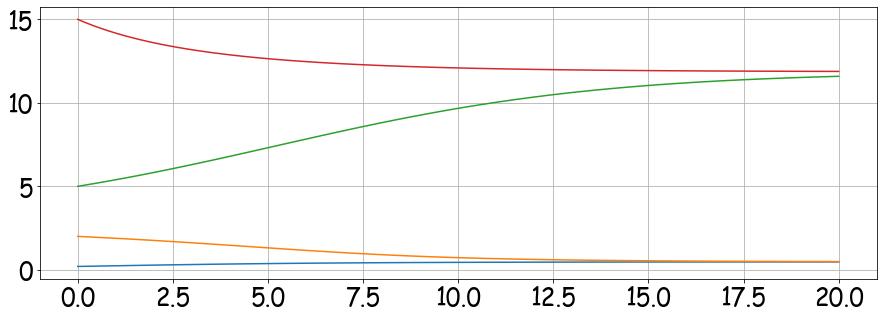

In [47]:
f = plt.figure(figsize=(15,5))

plt.plot(t, xt1, t, xt2, t, xt3, t, xt4)

plt.grid()

In [64]:
r = np.linspace(0.1, 2, 50)
k = np.linspace(0.1, 20, 50)

R,K = np.meshgrid(r, k)

In [65]:
t = np.linspace(0, 100, 10000)
X1 = np.zeros_like(R)
X2 = np.zeros_like(R)
for i in range(0, R.shape[0]):
    for j in range(0, R.shape[1]):
        r = R[i, j]
        k = K[i, j]
        x0 = 0.2
        xt = odeint(rhs, x0, t)
        X1[i,j] = xt[-1]
        
        x0 = 20
        xt = odeint(rhs, x0, t)
        X2[i,j] = xt[-1]

<IPython.core.display.Javascript object>


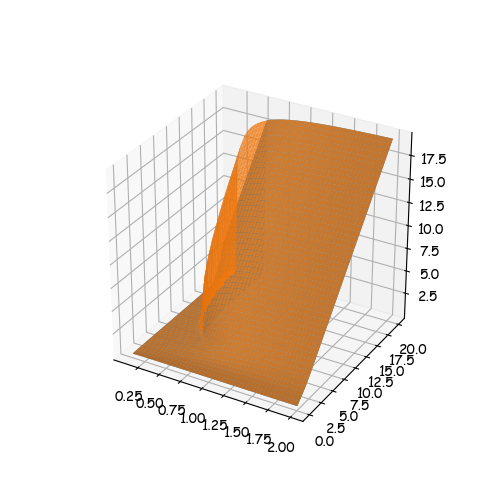

In [67]:
%matplotlib notebook

f = plt.figure(figsize=(5,5)) # figure size

ax = f.gca(projection='3d')

surf = ax.plot_surface(R, K, X1, facecolor='b', alpha=1.0)
surf = ax.plot_surface(R, K, X2, facecolor='r', alpha=0.8)


# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

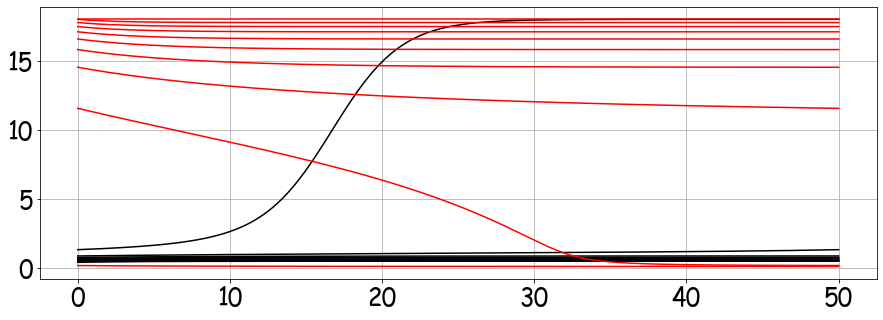

In [85]:
f = plt.figure(figsize=(15,5))
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

r = 0.4
k = 20
t = np.linspace(0, 50, 500)
x0 = 0.4

for r in np.linspace(0.4, 0.55, 10):
    xt = odeint(rhs, x0, t)
    plt.plot(t,xt, c='black')
    x0 = xt[-1]
for r in np.linspace(0.55, 0.1, 10):
    xt = odeint(rhs, x0, t)
    plt.plot(t,xt, c='red')
    x0 = xt[-1]

plt.grid()